**NOMBRE ALUMNO:** Jonathan Rodriguez

**FECHA:** 07-11-2019

## 1. Importe un csv desde internet

Utilice la base de datos de un compañero creada en la sesión pasada

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

df = pd.read_csv('subsample_jrc.csv')
df_comp = pd.read_csv('subsample_comp.csv').drop(columns='Unnamed: 0')

In [20]:
df.head()

undp_hdi ccodealp    ht_region    gle_cgdpc     imf_pop   wef_imort  \
0     0.351      NER  SubSaharian    644.53998         NaN         NaN   
1     0.909      SWE   WesternDem  39000.91000    9.645000    2.300000   
2     0.575      BGD    SouthAsia   1796.64000  154.695007   33.099998   
3     0.896      LUX   WesternDem  61404.48000    0.550000    1.700000   
4     0.431      SLE  SubSaharian    979.95001    6.232000  117.400002   

   who_alc2000   who_tobt   wdi_exph  
0         0.15   8.400000   5.821299  
1         7.30  21.900000  11.929840  
2         0.01  21.799999   2.818999  
3        11.12  24.400000   6.937873  
4         3.78  34.400002  11.089902

In [21]:
df_comp.head()

undp_hdi ccodealp      ht_region    gle_cgdpc     imf_pop  wef_imort  \
0     0.678      VNM  SouthEastAsia    4147.5698   89.691002       18.4   
1     0.729      JAM      Caribbean    4668.7700    2.799000       14.4   
2     0.784      ATG      Caribbean   12257.7100         NaN        NaN   
3     0.754      BRA          LatAm    9815.2402  202.768997       12.9   
4     0.911      LIE     WesternDem  102243.5200         NaN        NaN   

   who_alc2000   who_tobt  wdi_exph  
0         4.09  23.700001  7.066778  
1         3.83  17.600000  5.361525  
2         8.56        NaN  5.541683  
3         7.32  16.100000  8.322834  
4          NaN        NaN       NaN

## 2. Importe su conjunto de funciones

Genere un archivo _ancilliary_funcs.py_ para guardar las funciones creadas en la sesión pasada e impórtelo.

Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [22]:
from ancilliary_funcs_jrc import *


lista = []
# Registrando los nombres de columnas en una lista
for value in df_comp:
    lista.append(value)

# Analizando todas las variables con sus casos perdidos    
for value in range(len(lista)):
    codigo_columna = lista[value]
    c_perdidos, p_perdidods = getna(df_comp,codigo_columna)
    print(lista[value])
    print('____________________')
    print('Cantidad de perdidos {}'.format(c_perdidos))
    print('Porcentaje de perdidos: {}'.format(round(p_perdidods,2)))   
    print('\n')    
    


undp_hdi
____________________
Cantidad de perdidos 6
Porcentaje de perdidos: 0.06


ccodealp
____________________
Cantidad de perdidos 0
Porcentaje de perdidos: 0.0


ht_region
____________________
Cantidad de perdidos 0
Porcentaje de perdidos: 0.0


gle_cgdpc
____________________
Cantidad de perdidos 1
Porcentaje de perdidos: 0.01


imf_pop
____________________
Cantidad de perdidos 26
Porcentaje de perdidos: 0.27


wef_imort
____________________
Cantidad de perdidos 26
Porcentaje de perdidos: 0.27


who_alc2000
____________________
Cantidad de perdidos 8
Porcentaje de perdidos: 0.08


who_tobt
____________________
Cantidad de perdidos 32
Porcentaje de perdidos: 0.33


wdi_exph
____________________
Cantidad de perdidos 3
Porcentaje de perdidos: 0.03




## Desafío 3. Estime el puntaje Z

Estime el puntaje $z$ para las $10$ primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos, para ello haga lo siguiente:
* Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje $z$ de una observación se utiliza la fórmula:
    
$$z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$
* Para ordenar los valores puedes utilizar la función **sort_values** del DataFrame analizado. 
*Indicación:* Lean la documentación asociada al argumento **by** para evitar conflictos en la sobreescritura.
* Asegúrense de eliminar las observaciones que tengan valores perdidos con **dropna**.
*Indicación:* Lean la documentación asociada al método **reset_index**.
* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

In [23]:
def zvalue (df, col):
    """
    Función que calcula el z-value
    Parameters:
    dataframe (Dataframe): La base de datos donde se encuentran los datos específicos.
    col (str): columna a realizar el cálculo del puntaje Z

    Returns:  Columna nueve en Dataframe con el resultado del puntaje Z
   """         
    df = df.sort_values(by=[col])
    return (df[col] - df[col].mean()) / df[col].std()


df_comp['gle_cgdpc_zscore'] = zvalue(df_comp,'gle_cgdpc')
df_comp_cgdpc = df_comp.sort_values(by=['gle_cgdpc_zscore'])
df_comp_cgdpc = df_comp_cgdpc.dropna(subset=['gle_cgdpc_zscore'])
df_comp_cgdpc.reset_index(drop=True, inplace = True)

print('gle_cpgdc_zscore')
df_comp_cgdpc.iloc[:10]

gle_cpgdc_zscore


undp_hdi ccodealp    ht_region   gle_cgdpc  imf_pop   wef_imort  \
0     0.351      NER  SubSaharian   644.53998      NaN         NaN   
1     0.511      MDG  SubSaharian   822.62000      NaN   40.900002   
2     0.441      ETH  SubSaharian   900.77002   88.347   46.500000   
3     0.473      MWI  SubSaharian   938.34998   17.604   46.000000   
4     0.431      SLE  SubSaharian   979.95001    6.232  117.400002   
5     0.414      GIN  SubSaharian   993.83002   11.745   65.199997   
6     0.418      ERI  SubSaharian  1007.28000      NaN         NaN   
7     0.490      HTI        LatAm  1024.93990      NaN   56.500000   
8     0.438      MLI  SubSaharian  1063.26000   14.854   79.599998   
9     0.481      BEN  SubSaharian  1413.05000   10.320   56.200001   

   who_alc2000   who_tobt   wdi_exph  gle_cgdpc_zscore  
0         0.15   8.400000   5.821299         -0.728255  
1         0.87        NaN   3.041355         -0.718912  
2         1.86   4.700000   4.884313         -0.714812  
3         1.23  16.299999  11.377956         -0.712840  
4         3.78  34.400002  11.089902         -0.710658  
5         0.22        NaN   5.644798         -0.709930  
6         0.62        NaN   3.338293         -0.709224  
7         5.68  11.800000   7.555654         -0.708297  
8         0.61  18.600000   6.862166         -0.706287  
9         1.40   8.800000   4.594296         -0.687935

In [24]:
df_comp_cgdpc.iloc[-10:]

undp_hdi ccodealp      ht_region   gle_cgdpc  imf_pop  wef_imort  \
86     0.937      AUS     WesternDem   38611.949   23.621        4.1   
87     0.923      NLD     WesternDem   42258.352   16.865        3.4   
88       NaN      SMR     WesternDem   42664.211    0.034        NaN   
89     0.864      BRN  SouthEastAsia   46103.840    0.412        5.6   
90     0.920      IRL     WesternDem   46422.070    4.621        3.4   
91     0.938      CHE     WesternDem   50454.410    8.140        3.7   
92     0.924      SGP  SouthEastAsia   54268.148    5.470        2.3   
93     0.896      LUX     WesternDem   61404.480    0.550        1.7   
94     0.911      LIE     WesternDem  102243.520      NaN        NaN   
95       NaN      MCO     WesternDem  108481.130      NaN        NaN   

    who_alc2000   who_tobt   wdi_exph  gle_cgdpc_zscore  
86         9.71  16.000000   9.422300          1.263691  
87         8.68  25.700001  10.897293          1.454998  
88          NaN        NaN   6.129065          1.476292  
89         0.97  16.400000   2.648163          1.656750  
90        10.75  23.200001   7.783196          1.673446  
91         9.61  24.100000  11.659268          1.885002  
92         1.83  16.200001   4.922792          2.085088  
93        11.12  24.400000   6.937873          2.459493  
94          NaN        NaN        NaN          4.602098  
95          NaN        NaN   4.337683          4.929352

Se visualizará el histograma para una revisión adicional de los datos, antes de determinar las conclusiones

(array([1.06788376, 0.38664757, 0.07364716, 0.11047073, 0.07364716,
        0.01841179, 0.        , 0.        , 0.        , 0.03682358]),
 array([-0.72825498, -0.16249427,  0.40326643,  0.96902714,  1.53478784,
         2.10054855,  2.66630925,  3.23206996,  3.79783066,  4.36359137,
         4.92935207]),
 <a list of 10 Patch objects>)

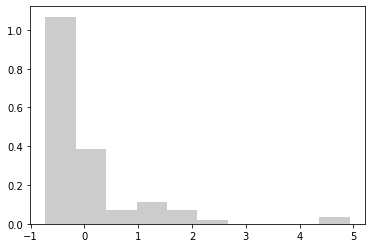

In [25]:
df_comp_cgdpc = df_comp_cgdpc.dropna(subset=['gle_cgdpc_zscore'])
plt.hist(df_comp_cgdpc['gle_cgdpc_zscore'], color='grey', alpha=.4, density = True)

El resultado del Puntaje Z para la variable gle_cgdpc nos indica cuántas desviaciones estándares se encuentra una observación respecto a la media. En este caso en particular, los valores no se encuentran distribuidos simétricamente y con presencia de outliers hacia la derecha, se puede observar que la distribución presenta sesgo de valores inferiores a cero. 

In [26]:
df_comp['wdi_exph_zscore'] = zvalue(df_comp,'wdi_exph')
df_comp_wdi_exph = df_comp.sort_values(by=['wdi_exph_zscore'])
df_comp_wdi_exph = df_comp_wdi_exph.dropna(subset=['wdi_exph_zscore'])
df_comp_wdi_exph.reset_index(drop=True, inplace = True)

df_comp_wdi_exph.iloc[:10]

undp_hdi ccodealp      ht_region   gle_cgdpc     imf_pop  wef_imort  \
0     0.688      TKM     EastEurope  13217.3900         NaN        NaN   
1     0.552      MMR  SouthEastAsia   5733.3701   51.418999  41.099998   
2     0.548      PAK      SouthAsia   2855.5500  186.190002  69.300003   
3     0.864      BRN  SouthEastAsia  46103.8400    0.412000   5.600000   
4     0.575      BGD      SouthAsia   1796.6400  154.695007  33.099998   
5     0.686      IDN  SouthEastAsia   4780.0098  252.164993  25.799999   
6     0.511      MDG    SubSaharian    822.6200         NaN  40.900002   
7       NaN      NRU        Pacific   3130.4700    0.012000        NaN   
8     0.418      ERI    SubSaharian   1007.2800         NaN        NaN   
9     0.781      SYC    SubSaharian   9583.3203    0.090000  11.200000   

   who_alc2000   who_tobt  wdi_exph  gle_cgdpc_zscore  wdi_exph_zscore  
0         2.90        NaN  2.067386         -0.068625        -1.626675  
1         0.70  20.000000  2.275755         -0.461271        -1.550962  
2         0.04  22.600000  2.613916         -0.612255        -1.428088  
3         0.97  16.400000  2.648163          1.656750        -1.415644  
4         0.01  21.799999  2.818999         -0.667810        -1.353569  
5         0.09  38.500000  2.846860         -0.511289        -1.343445  
6         0.87        NaN  3.041355         -0.718912        -1.272773  
7          NaN  48.900002  3.326649         -0.597832        -1.169108  
8         0.62        NaN  3.338293         -0.709224        -1.164877  
9         9.72  26.700001  3.369817         -0.259285        -1.153423

In [27]:
df_comp_wdi_exph.iloc[-10:]

undp_hdi ccodealp    ht_region    gle_cgdpc  imf_pop   wef_imort  \
84     0.775      SRB   EastEurope  11343.92000    7.167    5.700000   
85     0.470      DJI  SubSaharian   2685.50000      NaN         NaN   
86     0.923      NLD   WesternDem  42258.35200   16.865    3.400000   
87     0.773      CUB        LatAm   5899.93990      NaN         NaN   
88     0.431      SLE  SubSaharian    979.95001    6.232  117.400002   
89     0.473      MWI  SubSaharian    938.34998   17.604   46.000000   
90     0.894      FRA   WesternDem  34007.89800   64.028    3.400000   
91     0.938      CHE   WesternDem  50454.41000    8.140    3.700000   
92     0.701      MDV    SouthAsia  13349.76000    0.336         NaN   
93       NaN      TUV      Pacific   3174.05000    0.011         NaN   

    who_alc2000   who_tobt   wdi_exph  gle_cgdpc_zscore  wdi_exph_zscore  
84         9.09  42.099998  10.368812         -0.166916         1.389739  
85         0.38        NaN  10.568256         -0.621177         1.462209  
86         8.68  25.700001  10.897293          1.454998         1.581768  
87         4.37  36.099998  11.058801         -0.452532         1.640454  
88         3.78  34.400002  11.089902         -0.710658         1.651755  
89         1.23  16.299999  11.377956         -0.712840         1.756423  
90        11.50  28.100000  11.539519          1.022141         1.815128  
91         9.61  24.100000  11.659268          1.885002         1.858640  
92         1.92        NaN  13.733521         -0.061680         2.612343  
93         1.34        NaN  16.536638         -0.595545         3.630886

Se visualizará el histograma para una revisión adicional de los datos, antes de determinar las conclusiones

(array([0.24281136, 0.36421705, 0.38445133, 0.40468561, 0.24281136,
        0.1011714 , 0.12140568, 0.        , 0.02023428, 0.02023428]),
 array([-1.62667542, -1.10091924, -0.57516306, -0.04940689,  0.47634929,
         1.00210546,  1.52786164,  2.05361782,  2.57937399,  3.10513017,
         3.63088634]),
 <a list of 10 Patch objects>)

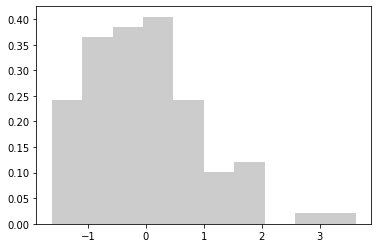

In [28]:
df_comp_wdi_exph = df_comp_wdi_exph.dropna(subset=['wdi_exph_zscore'])
plt.hist(df_comp_wdi_exph['wdi_exph_zscore'], color='grey', alpha=.4, density=True)

El resultado del Puntaje Z para la variable wdi_exph nos indica cuántas desviaciones estándares se encuentra una observación respecto a la media. En este caso en particular, los valores presentan una mayor simetría de datos asociados con relación al caso anterior y se observa la presencia de outliers hacia la derecha

## Desafío 4: Estime el puntaje $z$ de las regiones

Para ello, modifique la función para generar dotplots de la clase pasada, donde deberá agregar una opción al argumento *statistic* para calcular el puntaje $z$ y su promedio de $z$ por agrupación.

In [32]:
def getdotplot(dataframe,plot_var,plot_by,global_stat = False, statistic = 'mean'):
    """
    Función que liste las observaciones perdidas de una variable

    Parameters:
    dataframe (Dataframe): La base de datos donde se encuentran los datos específicos.
    plot_var (str): La variable a analizar y extraer las medias
    plot_by (str): La variable agrupadora
    global_stat: Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False     
    statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean

    Returns:  Graficacion de Dotplot


   """      
    df_dropna = dataframe.dropna(subset=[plot_var]) 
    plt.grid()
    plt.title("caso: {}".format(plot_var))
    if (statistic == 'mean'):
        group_stat = round(df_dropna.groupby(plot_by)[plot_var].mean(),2)
        if (global_stat):
            plt.axvline(df_dropna[plot_var].mean(), color = 'tomato', linestyle = '--', )
        plt.plot(group_stat.values, group_stat.index, 'o', color = 'blue')
    if (statistic == 'median'):
        group_stat = round(df_dropna.groupby(plot_by)[plot_var].median(),2)
        if (global_stat):
            plt.axvline(df_dropna[plot_var].median(), color = 'green', linestyle = '--')
        plt.plot(group_stat.values, group_stat.index, 'o', color = 'blue')         
    if (statistic == 'z-score'):
        tmp_df = dataframe[plot_var].dropna()
        group_stat = dataframe.groupby(plot_by)[plot_var].mean()
        plt.axvline(df_dropna[plot_var].mean(), color = 'tomato', linestyle = '--', )
        plt.plot(group_stat.values, group_stat.index, 'o', color = 'blue')      
        


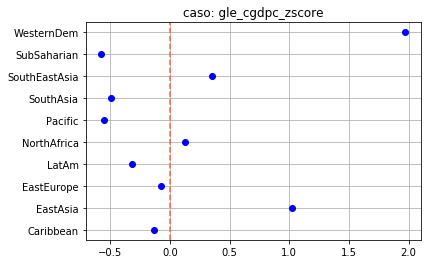

In [30]:
getdotplot(df_comp,'gle_cgdpc_zscore','ht_region',True,'z-score')  

### Desafío 5: Genere un método que devuelva un gráfico comparando dos curvas de densidad
* El método debe contener los siguientes argumentos:
    * *df1* : Tabla de datos 1.
    * *df2* : Tabla de datos 2.
    * *variable* : Variable a contrastar.
    * *log* : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .
* Grafique las curvas para *imf_pop* , *gle_cgdpc* y *undp_hdi*. ¿En qué casos es necesario utilizar logaritmos?.¿Por qué?.

*Indicaciones :* 
* Cuidado con el *$log(0)$*

In [31]:
def curva_densidad(df1, df2, var, log=False):
    
    if (log is False):
        df1_curvad = df1[var].dropna()
        df1_curvad = df1_curvad.sort_values(ascending=True)
        
        df2_curvad = df2[var].dropna()
        df2_curvad = df2_curvad.sort_values(ascending=True)        
    else:
        df1_curvad =  np.log(df1[var].dropna())
        df1_curvad = df1_curvad.sort_values(ascending=True)

        df2_curvad =  np.log(df2[var].dropna())
        df2_curvad = df2_curvad.sort_values(ascending=True)        
    
    plt.plot(df1_curvad, stats.norm.pdf(df1_curvad, df1_curvad.mean(),df1_curvad.std()),
             label='Sample 1 {}'.format(var), linewidth=2)
    plt.plot(df2_curvad, stats.norm.pdf(df2_curvad, df2_curvad.mean(),df2_curvad.std()),
             label='Sample 2 {}'.format(var), linewidth=2)
    
    plt.legend(loc='lower right')
    plt.title("Curvas de densidad para {}".format(var))    



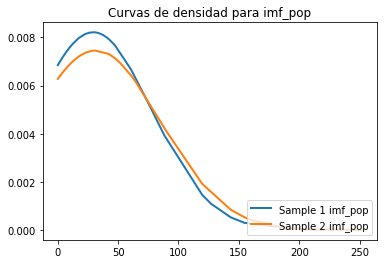

In [14]:
curva_densidad(df, df_comp, 'imf_pop', False)

* En este caso no se presenta un comportamiento similar a una normal (0,1), por tanto debe aplicarse el logaritmo,  ya que la distribución se encuentra altamente sesgada. Al aplicar el logaritmo permitirá reescalar sus valores y que los mismos se aproxien a una distribución normal

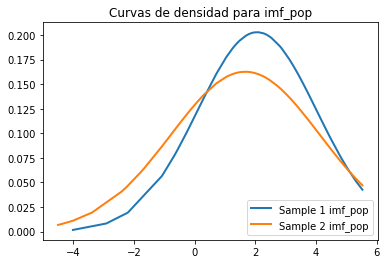

In [15]:
curva_densidad(df, df_comp, 'imf_pop', True)


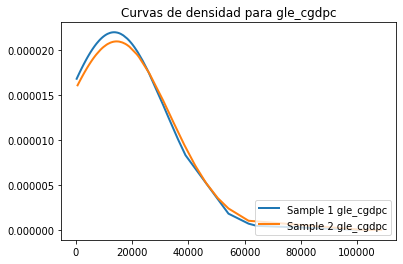

In [16]:
curva_densidad(df, df_comp, 'gle_cgdpc', False)

* En este caso no se presenta un comportamiento similar a una normal (0,1), por tanto debe aplicarse el logaritmo,  ya que la distribución se encuentra altamente sesgada. Al aplicar el logaritmo permitirá reescalar sus valores y que los mismos se aproxien a una distribución normal

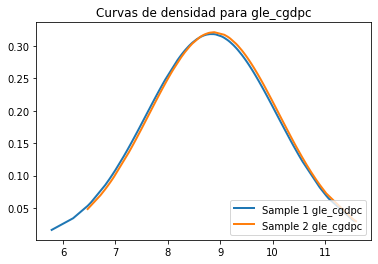

In [17]:
curva_densidad(df, df_comp, 'gle_cgdpc', True)

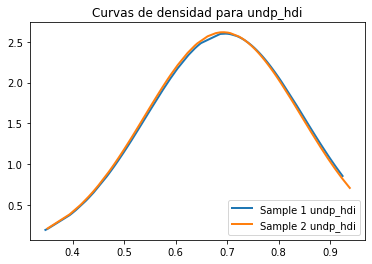

In [18]:
curva_densidad(df, df_comp, 'undp_hdi', False)